# Trabajo de Machine Learning: Clasificación de Cáncer de Mama

Este notebook sigue las fases recomendadas para un proyecto de Machine Learning, utilizando el dataset `breast_cancer_wisconsin.csv`.

**Fases:**
1. Análisis exploratorio de datos (EDA)
2. Preprocesamiento y tratamiento de datos
3. Modelado con SVM, Decision Tree, Random Forest, XGBoost
4. Optimización de hiperparámetros y validación cruzada
5. Alternativa con Bagging, Boosting o Voting

---

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
# Cargar el dataset
data = pd.read_csv('breast_cancer_wisconsin.csv')

# Mostrar primeras filas y dimensiones
display(data.head())
print(f"Forma del dataset: {data.shape}")
print(f"Columnas: {data.columns.tolist()}")

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Forma del dataset: (569, 32)
Columnas: ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [3]:
# Análisis exploratorio inicial
data.info()
print("\nValores nulos por columna:")
print(data.isnull().sum())

print("\nEstadísticas descriptivas:")
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,ID,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


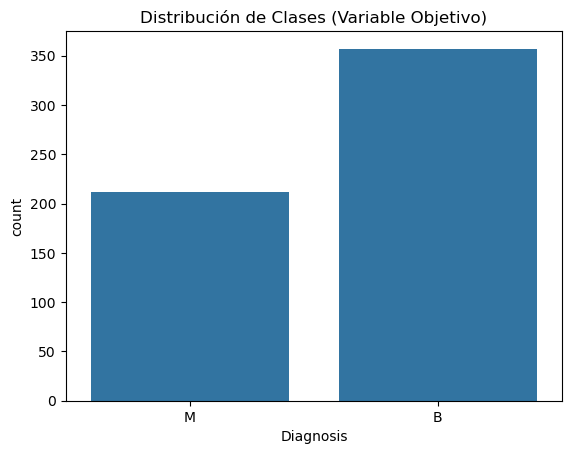

Diagnosis
B    357
M    212
Name: count, dtype: int64


In [4]:
# Análisis de la variable objetivo y balance de clases
if 'diagnosis' in data.columns:
    target_col = 'diagnosis'
else:
    target_col = data.columns[1]  # Asumir segunda columna si no está explícito

sns.countplot(x=target_col, data=data)
plt.title('Distribución de Clases (Variable Objetivo)')
plt.show()

print(data[target_col].value_counts())

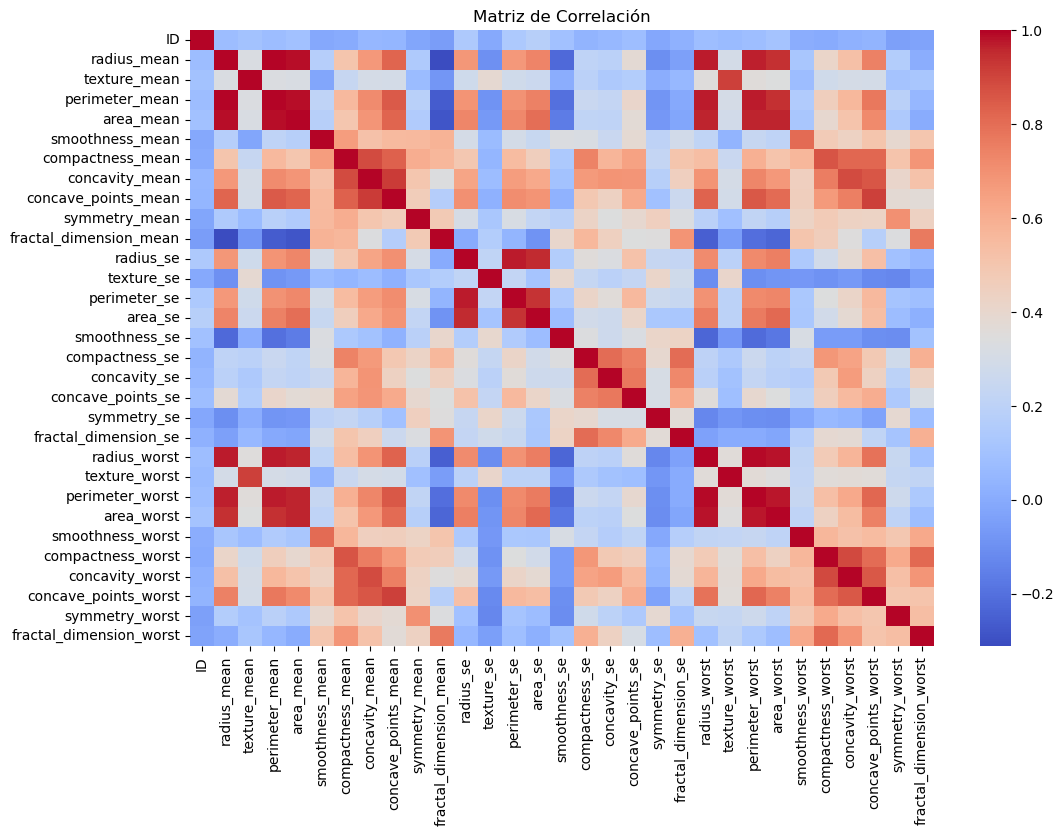

In [5]:
# Matriz de correlación y visualización
corr = data.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [6]:
# Imputación de datos faltantes (si existen)
if data.isnull().sum().sum() > 0:
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            if data[col].dtype in [np.float64, np.int64]:
                data[col].fillna(data[col].mean(), inplace=True)
            else:
                data[col].fillna(data[col].mode()[0], inplace=True)
    print('Datos faltantes imputados.')
else:
    print('No hay datos faltantes.')

No hay datos faltantes.


In [7]:
# Codificación de variables categóricas y separación de variables
if data[target_col].dtype == 'O':
    le = LabelEncoder()
    data[target_col] = le.fit_transform(data[target_col])
    print('Variable objetivo codificada.')

X = data.drop([target_col], axis=1)
y = data[target_col]

print(f"Shape X: {X.shape}, Shape y: {y.shape}")

Variable objetivo codificada.
Shape X: (569, 31), Shape y: (569,)


In [8]:
# División en train/test y escalado de variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (426, 31), Test shape: (143, 31)


## Modelado y Optimización de Hiperparámetros

Se entrenarán los modelos SVM, Decision Tree, Random Forest y XGBoost, utilizando GridSearchCV para afinar hiperparámetros y validación cruzada para evaluar el desempeño.

## Entrenamiento, evaluación y comparación de modelos de clasificación

A continuación se entrena y evalúa SVM, Decision Tree, Random Forest y un modelo Ensemble (Voting). Se comparan usando accuracy, precision, recall y f1-score, mostrando los resultados en una tabla.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenamiento de modelos base
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
tree_pred = tree_model.predict(X_test_scaled)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

ensemble_model = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('tree', tree_model),
    ('rf', rf_model)
], voting='soft')
ensemble_model.fit(X_train_scaled, y_train)
ensemble_pred = ensemble_model.predict(X_test_scaled)

# Evaluación y tabla comparativa
def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred)
    }

scores = {
    'SVM': get_metrics(y_test, svm_pred),
    'Decision Tree': get_metrics(y_test, tree_pred),
    'Random Forest': get_metrics(y_test, rf_pred),
    'Ensemble': get_metrics(y_test, ensemble_pred)
}

import pandas as pd
results_df = pd.DataFrame(scores).T
print('Tabla comparativa de métricas:')
display(results_df.round(4))

## Optimización de hiperparámetros y comparación final

Se realiza GridSearchCV para encontrar los mejores hiperparámetros de cada modelo, se reentrenan y se comparan nuevamente en una tabla.

In [ ]:
from sklearn.model_selection import GridSearchCV

# SVM
param_grid_svm = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(SVC(probability=True), param_grid_svm, cv=5, scoring='f1', n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

# Decision Tree
param_grid_tree = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 4]}
grid_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='f1', n_jobs=-1)
grid_tree.fit(X_train_scaled, y_train)

# Random Forest
param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Ensemble
best_svm = grid_svm.best_estimator_
best_tree = grid_tree.best_estimator_
best_rf = grid_rf.best_estimator_
ensemble_model = VotingClassifier(estimators=[
    ('svm', best_svm),
    ('tree', best_tree),
    ('rf', best_rf)
], voting='soft')
param_grid_ensemble = {'voting': ['hard', 'soft'], 'weights': [(1,1,1), (2,1,1), (1,2,1), (1,1,2)]}
grid_ensemble = GridSearchCV(ensemble_model, param_grid_ensemble, cv=5, scoring='f1', n_jobs=-1)
grid_ensemble.fit(X_train_scaled, y_train)

# Re-evaluación de modelos optimizados
def get_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred)
    }

svm_pred = grid_svm.best_estimator_.predict(X_test_scaled)
tree_pred = grid_tree.best_estimator_.predict(X_test_scaled)
rf_pred = grid_rf.best_estimator_.predict(X_test_scaled)
ensemble_pred = grid_ensemble.best_estimator_.predict(X_test_scaled)

scores_opt = {
    'SVM_opt': get_metrics(y_test, svm_pred),
    'Decision Tree_opt': get_metrics(y_test, tree_pred),
    'Random Forest_opt': get_metrics(y_test, rf_pred),
    'Ensemble_opt': get_metrics(y_test, ensemble_pred)
}

results_df_opt = pd.DataFrame(scores_opt).T
print('Tabla comparativa de modelos optimizados:')
display(results_df_opt.round(4))

print('Mejores hiperparámetros:')
print('SVM:', grid_svm.best_params_)
print('Decision Tree:', grid_tree.best_params_)
print('Random Forest:', grid_rf.best_params_)
print('Ensemble:', grid_ensemble.best_params_)

## Visualización gráfica de métricas comparativas

A continuación se muestran gráficos de barras para comparar las métricas de los modelos optimizados.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de métricas directas
plt.figure(figsize=(10, 6))
results_df_opt[['accuracy', 'precision', 'recall', 'f1_score']].plot(kind='bar', ax=plt.gca())
plt.title('Comparación de Métricas por Modelo (Optimizado)')
plt.ylabel('Score')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [9]:
# SVM: GridSearchCV y validación cruzada
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True)
gs_svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
gs_svm.fit(X_train_scaled, y_train)
print(f"Mejores parámetros SVM: {gs_svm.best_params_}")
print(f"Mejor score CV: {gs_svm.best_score_:.4f}")

svm_best = gs_svm.best_estimator_
cv_score = cross_val_score(svm_best, X_train_scaled, y_train, cv=5).mean()
print(f"Validación cruzada SVM (accuracy): {cv_score:.4f}")

Mejores parámetros SVM: {'C': 0.1, 'kernel': 'linear'}
Mejor score CV: 0.9789
Validación cruzada SVM (accuracy): 0.9789


In [10]:
# Decision Tree: GridSearchCV y validación cruzada
dt_params = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier(random_state=42)
gs_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
gs_dt.fit(X_train_scaled, y_train)
print(f"Mejores parámetros Decision Tree: {gs_dt.best_params_}")
print(f"Mejor score CV: {gs_dt.best_score_:.4f}")

dt_best = gs_dt.best_estimator_
cv_score = cross_val_score(dt_best, X_train_scaled, y_train, cv=5).mean()
print(f"Validación cruzada Decision Tree (accuracy): {cv_score:.4f}")

Mejores parámetros Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Mejor score CV: 0.9295
Validación cruzada Decision Tree (accuracy): 0.9295


In [11]:
# Random Forest: GridSearchCV y validación cruzada
rf_params = {'n_estimators': [50, 100], 'max_depth': [3, 5, None]}
rf = RandomForestClassifier(random_state=42)
gs_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
gs_rf.fit(X_train_scaled, y_train)
print(f"Mejores parámetros Random Forest: {gs_rf.best_params_}")
print(f"Mejor score CV: {gs_rf.best_score_:.4f}")

rf_best = gs_rf.best_estimator_
cv_score = cross_val_score(rf_best, X_train_scaled, y_train, cv=5).mean()
print(f"Validación cruzada Random Forest (accuracy): {cv_score:.4f}")

Mejores parámetros Random Forest: {'max_depth': None, 'n_estimators': 100}
Mejor score CV: 0.9648
Validación cruzada Random Forest (accuracy): 0.9648
Validación cruzada Random Forest (accuracy): 0.9648


In [12]:
# XGBoost: GridSearchCV y validación cruzada
xgb_params = {'n_estimators': [50, 100], 'max_depth': [3, 5], 'learning_rate': [0.01, 0.1, 0.2]}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
gs_xgb = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
gs_xgb.fit(X_train_scaled, y_train)
print(f"Mejores parámetros XGBoost: {gs_xgb.best_params_}")
print(f"Mejor score CV: {gs_xgb.best_score_:.4f}")

xgb_best = gs_xgb.best_estimator_
cv_score = cross_val_score(xgb_best, X_train_scaled, y_train, cv=5).mean()
print(f"Validación cruzada XGBoost (accuracy): {cv_score:.4f}")

c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:50] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:50] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:50] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20

Mejores parámetros XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Mejor score CV: 0.9625


c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:53] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:53] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:53] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20

Validación cruzada XGBoost (accuracy): 0.9625


c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:23:53] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- SVM ---
Accuracy: 0.9790 | Precision: 1.0000 | Recall: 0.9434 | F1: 0.9709
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



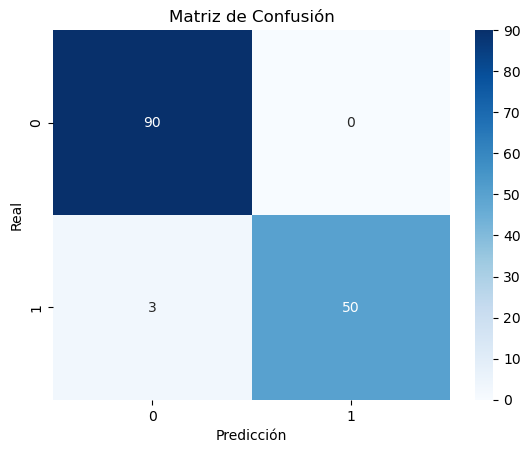

--- Decision Tree ---
Accuracy: 0.9510 | Precision: 0.9792 | Recall: 0.8868 | F1: 0.9307
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        90
           1       0.98      0.89      0.93        53

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



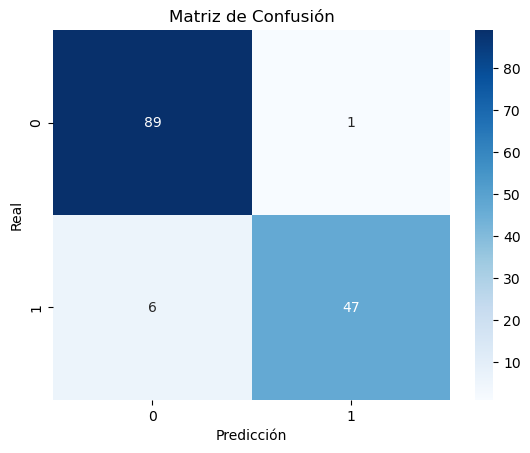

--- Random Forest ---
Accuracy: 0.9650 | Precision: 1.0000 | Recall: 0.9057 | F1: 0.9505
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



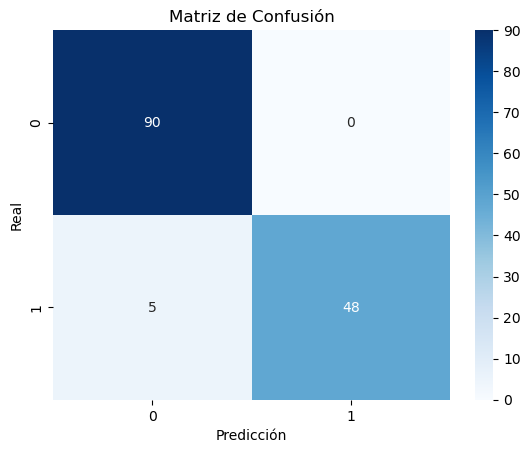

--- XGBoost ---
Accuracy: 0.9790 | Precision: 1.0000 | Recall: 0.9434 | F1: 0.9709
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



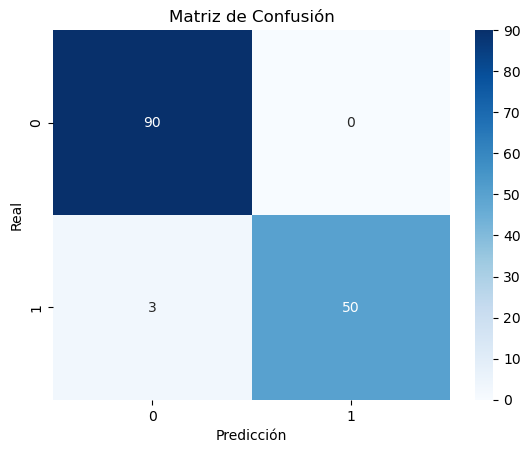

In [13]:
# Evaluación de modelos en test set
def eval_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

print('--- SVM ---')
eval_model(svm_best, X_test_scaled, y_test)
print('--- Decision Tree ---')
eval_model(dt_best, X_test_scaled, y_test)
print('--- Random Forest ---')
eval_model(rf_best, X_test_scaled, y_test)
print('--- XGBoost ---')
eval_model(xgb_best, X_test_scaled, y_test)

## Alternativa: Ensemble (Bagging, Boosting o Voting)

Se evaluará un modelo de ensamble para comparar el desempeño con los modelos individuales.

--- VotingClassifier (Ensemble) ---
Accuracy: 0.9790 | Precision: 1.0000 | Recall: 0.9434 | F1: 0.9709
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



c:\Users\matias\anaconda3\envs\MACHINELEARNING\lib\site-packages\xgboost\training.py:183: UserWarning: [20:24:06] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


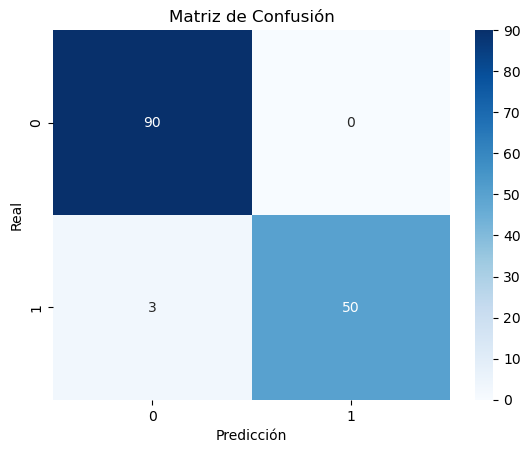

In [14]:
# VotingClassifier (Ensemble)
voting = VotingClassifier(estimators=[
    ('svm', svm_best),
    ('dt', dt_best),
    ('rf', rf_best),
    ('xgb', xgb_best)
], voting='soft')
voting.fit(X_train_scaled, y_train)

print('--- VotingClassifier (Ensemble) ---')
eval_model(voting, X_test_scaled, y_test)